In [1]:
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_curve, auc, accuracy_score, confusion_matrix, classification_report, roc_auc_score

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 90)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize 

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
def scorer():
    f1_scorer = make_scorer(score_func=f1_score,greater_is_better=True)
    return f1_scorer  

In [3]:
df = pd.read_csv('data/working_clean.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 91 columns):
acousticness        4836 non-null float64
danceability        4836 non-null float64
duration_ms         4836 non-null float64
energy              4836 non-null float64
genre               4836 non-null int64
instrumentalness    4836 non-null float64
liveness            4836 non-null float64
loudness            4836 non-null float64
speechiness         4836 non-null float64
tempo               4836 non-null float64
track_id            4836 non-null object
valence             4836 non-null float64
key_0               4836 non-null int64
key_1               4836 non-null int64
key_2               4836 non-null int64
key_3               4836 non-null int64
key_4               4836 non-null int64
key_5               4836 non-null int64
key_6               4836 non-null int64
key_7               4836 non-null int64
key_8               4836 non-null int64
key_9               4836 non-nul

In [5]:
y = df['genre']
X = df.drop(columns=['genre','track_id'], axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=123)

# Baseline Stinky Model

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


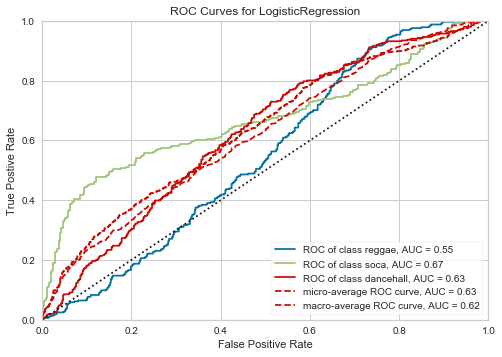

In [7]:
model = LogisticRegression()
visualizer = ROCAUC(model, classes=['reggae','soca','dancehall'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

# Pipeline

In [31]:
# Construct some pipelines
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('log', OneVsRestClassifier(LogisticRegression(random_state=123)))])

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('tree', tree.DecisionTreeClassifier(random_state=123))])

pipe_bt = Pipeline([('scl', StandardScaler()),
                    ('bt', BaggingClassifier(tree.DecisionTreeClassifier(random_state = 123)))])

pipe_rf = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('rf', RandomForestClassifier(random_state=123))])

pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('knn', KNeighborsClassifier())])

# List of pipelines for ease of iteration
pipelines = [pipe_lr, pipe_dt, pipe_bt, pipe_rf, pipe_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Bagged Decision Tree', 3: 'Random Forrest', 
             4: 'K Nearest'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)
#     pipe.predict(X_test)

# # Compare accuracies
for idx, val in enumerate(pipelines):
#     print(val.f1_score())
     print('%s pipeline test accuracy: %.4f' % (pipe_dict[idx], val.score(X_test, y_test)))

# # Identify the most accurate model on test data
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
    
    
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Logistic Regression pipeline test accuracy: 0.8006
Decision Tree pipeline test accuracy: 0.7717
Bagged Decision Tree pipeline test accuracy: 0.8295
Random Forrest pipeline test accuracy: 0.7934
K Nearest pipeline test accuracy: 0.7893
Classifier with best accuracy: Bagged Decision Tree


# With GridSearch

In [9]:
pipe_knn = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('knn', KNeighborsClassifier())])

param_grid_knn = {'knn__n_neighbors':[10,15,20] ,
              'knn__leaf_size':[50,60,70],
              'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
                }

gs_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)

gs_knn.fit(X_train, y_train)

gs_knn_best = gs_knn.best_params_
print(gs_knn_best)

{'knn__algorithm': 'ball_tree', 'knn__leaf_size': 60, 'knn__n_neighbors': 15}


### Decision tree cannot be optimised beyond basic stinky model

In [54]:
pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('tree', tree.DecisionTreeClassifier(random_state=123))])

param_grid_dt = {'tree__max_features':[6,8,10],
                 'tree__min_samples_leaf':[5,10,15],
                 'tree__max_depth':[3,4,5,6,7,8,9]  
             }

gs_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=5)

gs_dt.fit(X_train, y_train)
gs_dt.predict(X_test)

gs_dt_best = gs_dt.best_params_

print(gs_dt_best)

{'tree__max_depth': 9, 'tree__max_features': 8, 'tree__min_samples_leaf': 15}


In [40]:
pipe_lr_1 = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('log', OneVsRestClassifier(LogisticRegression(random_state=123, solver='saga')))])

param_grid_lr = {'log__estimator__penalty':['elasticnet'],
                'log__estimator__max_iter':[100,200,300,400,500],
                 'log__estimator__l1_ratio':[0.2,0.4,0.6,0.8]
                 }

gs_lr_1 = GridSearchCV(pipe_lr_1, param_grid_lr, cv=5)

gs_lr_1.fit(X_train, y_train)

gs_lr_1_best = gs_lr_1.best_params_

print(gs_lr_1_best)

{'log__estimator__l1_ratio': 0.6, 'log__estimator__max_iter': 500, 'log__estimator__penalty': 'elasticnet'}


In [57]:
pipe_lr_2 = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=5)),
                    ('log', OneVsRestClassifier(LogisticRegression(random_state=123, multi_class='multinomial', class_weight='balanced')))])

param_grid_lr = {'log__estimator__penalty':['l2'],
                 'log__estimator__solver':['newton-cg','sag','lbfgs'],
                 'log__estimator__max_iter':[100,200,300,400,500]
                 }

gs_lr_2 = GridSearchCV(pipe_lr_2, param_grid_lr, cv=5)

gs_lr_2.fit(X_train, y_train)

gs_lr_2_best = gs_lr_2.best_params_

print(gs_lr_2_best)

{'log__estimator__max_iter': 100, 'log__estimator__penalty': 'l2', 'log__estimator__solver': 'newton-cg'}


In [ ]:
pipe_bt = Pipeline([('scl', StandardScaler()),
                    ('bt', BaggingClassifier(tree.DecisionTreeClassifier(random_state = 123)))])


param_grid_bt = {'bt__base_estimator__max_features':[6,8,10],
                 'bt__base_estimator__min_samples_leaf':[5,7,9],
                 'bt__base_estimator__max_depth':[7,8,9,10,11,12],
                 'bt__n_estimators':[10,12,14,16]
             }

gs_bt = GridSearchCV(pipe_bt, param_grid_bt, cv=5)

gs_bt.fit(X_train, y_train)
gs_bt.predict(X_test)

gs_bt_best = gs_bt.best_params_

print(gs_bt_best)


# dict_keys(['memory', 'steps', 'verbose', 'scl', 'bt', 
#            'scl__copy', 'scl__with_mean', 'scl__with_std', 'bt__base_estimator__class_weight', 
#            'bt__base_estimator__criterion', 'bt__base_estimator__max_depth', 'bt__base_estimator__max_features', 
#            'bt__base_estimator__max_leaf_nodes', 'bt__base_estimator__min_impurity_decrease', 'bt__base_estimator__min_impurity_split', 
#            'bt__base_estimator__min_samples_leaf', 'bt__base_estimator__min_samples_split', 'bt__base_estimator__min_weight_fraction_leaf', 
#            'bt__base_estimator__presort', 'bt__base_estimator__random_state', 'bt__base_estimator__splitter', 'bt__base_estimator', 'bt__bootstrap', 
#            'bt__bootstrap_features', 'bt__max_features', 'bt__max_samples', 'bt__n_estimators', 'bt__n_jobs', 'bt__oob_score', 'bt__random_state', 
#            'bt__verbose', 'bt__warm_start'])

In [120]:

pipes = [gs_lr_1, gs_lr_2, gs_dt, gs_bt, gs_knn]
pipe_dict = {0: 'Log Reg Elastic', 1: 'Log Reg Laso', 2: 'Decision Tree', 3: 'Bagged Tree', 4: 'K Nearest'}

def best_pipe(pipes, pipe_dict):
    for pipe in pipes:
        pip = pipe.best_estimator_
        pip.fit(X_train, y_train)

        # # Compare accuracies
    for idx, val in enumerate(pipes):
         print('%s pipeline test accuracy: %.4f' % (pipe_dict[idx], val.score(X_test, y_test)))

    # # # Identify the most accurate model on test data
    # best_acc = 0.0
    # best_clf = 0
    # best_pipe = ''
    # for idx, val in enumerate(pipes):
    #     if val.score(X_test, y_test) > best_acc:
    #         best_acc = val.score(X_test, y_test)
    #         best_pipe = val
    #         best_clf = idx
    
    # # Save pipeline to file
    # joblib.dump(best_pipe, 'best_pipeline.pkl', compress=1)
    # print('Saved %s pipeline to file' % pipe_dict[best_clf])


    
best_pipe(pipes, pipe_dict)

Log Reg Elastic pipeline test accuracy: 0.8027
Log Reg Laso pipeline test accuracy: 0.7944
Decision Tree pipeline test accuracy: 0.7717
Bagged Tree pipeline test accuracy: 0.8430
K Nearest pipeline test accuracy: 0.8110


KeyError: 0

In [107]:
pipe_dict[val]

KeyError: GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=5, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('log',
                                        OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                                         class_weight='balanc...
                                                                                         random_state=123,
                                                                                         solver='warn',
                                                                                         tol=0.0001,
                                                                                         verbose=0,
                                                                                         warm_start=False),
                                                            n_jobs=None))],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'log__estimator__max_iter': [100, 200, 300, 400, 500],
                         'log__estimator__penalty': ['l2'],
                         'log__estimator__solver': ['newton-cg', 'sag',
                                                    'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [75]:
estimator = pipe_bt
estimator.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scl', 'bt', 'scl__copy', 'scl__with_mean', 'scl__with_std', 'bt__base_estimator__class_weight', 'bt__base_estimator__criterion', 'bt__base_estimator__max_depth', 'bt__base_estimator__max_features', 'bt__base_estimator__max_leaf_nodes', 'bt__base_estimator__min_impurity_decrease', 'bt__base_estimator__min_impurity_split', 'bt__base_estimator__min_samples_leaf', 'bt__base_estimator__min_samples_split', 'bt__base_estimator__min_weight_fraction_leaf', 'bt__base_estimator__presort', 'bt__base_estimator__random_state', 'bt__base_estimator__splitter', 'bt__base_estimator', 'bt__bootstrap', 'bt__bootstrap_features', 'bt__max_features', 'bt__max_samples', 'bt__n_estimators', 'bt__n_jobs', 'bt__oob_score', 'bt__random_state', 'bt__verbose', 'bt__warm_start'])

# Func

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from scipy import interp
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import multilabel_confusion_matrix




In [ ]:
def multiclass_classifier(X,y,model,list_of_classes):
    
    # Binarize the output
    y = label_binarize(y, classes=list_of_classes)
    n_classes = y.shape[1]


    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                        random_state=42)
    ss = MinMaxScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

#     # Plot all ROC curves
#     plt.figure(figsize=(12,12))
#     plt.plot(fpr["micro"], tpr["micro"],
#              label='micro-average ROC curve (area = {0:0.2f})'
#                    ''.format(roc_auc["micro"]),
#              color='deeppink', linestyle=':', linewidth=4)

#     plt.plot(fpr["macro"], tpr["macro"],
#              label='macro-average ROC curve (area = {0:0.2f})'
#                    ''.format(roc_auc["macro"]),
#              color='navy', linestyle=':', linewidth=4)

#     colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','purple','red','blue'])
#     for i, color in zip(range(n_classes), colors):
#         plt.plot(fpr[i], tpr[i], color=color,
#                  label='ROC curve of class {0} (area = {1:0.2f})'
#                  ''.format(i+1, roc_auc[i]))


#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Some extension of Receiver operating characteristic to multi-class')
#     plt.legend(loc="lower right")
#     figure=plt.show()
    
    
    y_prob = classifier.predict_proba(X_test)

    # macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
    #                                   average="macro")
    # weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
    #                                      average="weighted")
    macro_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                      average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                         average="weighted")
    # print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    #       "(weighted by prevalence)"
    #       .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    
    y_pred = classifier.predict(X_test)
            
    mcm = multilabel_confusion_matrix(y_test,y_pred)
                  
    
    
    return mcm, print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr)), figure

In [ ]:
multiclass_classifier(X = X,y = y, model = KNeighborsClassifier(),list_of_classes = [0,1,2])

In [ ]:
def dummies_back_to_categorical(data,range_of_columns,categorical_column_name):
    
    # Create 2 lists of column names 
    columns_to_convert = data.iloc[:,range_of_columns].columns
    list_of_columns = list(columns_to_convert)
    
    # Cycle through each dummy column name and create a list of separate dataframes
    # for each dummy column where the dummy is true
    iteration = -1    
    for col in columns_to_convert:
        iteration+=1
        list_of_columns[iteration] = data.loc[data[col]==1,:]
    
    list_of_dataframes = list_of_columns
    
#     # Now cycle through our list of dataframes adding the new categorical column
#     # and assigning a number for each dummy variable from 1 to max in our range
    iteration = 0
    for i in list_of_dataframes:
        iteration+=1
        i[categorical_column_name] = iteration
        
    data_concat = pd.concat(list_of_dataframes).reset_index()
    data_no_dummies = data_concat.drop(columns=columns_to_convert)
    data_no_dummies.drop(data_no_dummies.columns[0], axis = 1, inplace=True)
    
    return data_no_dummies

In [ ]:
def multiclass_classifier_decision_tree(X,y,model,list_of_classes):
    
    # Binarize the output
    y = label_binarize(y, classes=list_of_classes)
    n_classes = y.shape[1]


    # shuffle and split training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                        random_state=42)
    ss = MinMaxScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(model)
    y_score = classifier.fit(X_train, y_train).predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(12,12))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','purple','red','blue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i+1, roc_auc[i]))


    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    figure=plt.show()
    
    
    y_prob = classifier.predict_proba(X_test)

    # macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
    #                                   average="macro")
    # weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
    #                                      average="weighted")
    macro_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                      average="macro")
    weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob,
                                         average="weighted")
    # print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    #       "(weighted by prevalence)"
    #       .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
    
    y_pred = classifier.predict(X_test)
    
    mcm = multilabel_confusion_matrix(y_test,y_pred)
    
    return mcm, print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
          "(weighted by prevalence)"
          .format(macro_roc_auc_ovr, weighted_roc_auc_ovr)), figure